In [1]:
from qiskit import *

In [2]:
from qiskit_ibm_runtime import QiskitRuntimeService

with open("ibmapi.txt", "r") as f:
    token = f.read().strip()

QiskitRuntimeService.save_account(
    token=token,
    instance="Practice",
    set_as_default=True,
    overwrite=True  # Allow overwriting the existing account
)

service = QiskitRuntimeService()


In [3]:
from qiskit_aer import Aer

In [4]:
Aer.backends()

[AerSimulator('aer_simulator'),
 AerSimulator('aer_simulator_statevector'),
 AerSimulator('aer_simulator_density_matrix'),
 AerSimulator('aer_simulator_stabilizer'),
 AerSimulator('aer_simulator_matrix_product_state'),
 AerSimulator('aer_simulator_extended_stabilizer'),
 AerSimulator('aer_simulator_unitary'),
 AerSimulator('aer_simulator_superop'),
 QasmSimulator('qasm_simulator'),
 StatevectorSimulator('statevector_simulator'),
 UnitarySimulator('unitary_simulator')]

In [5]:
provider = service.backends()

In [6]:
provider

[<IBMBackend('ibm_torino')>, <IBMBackend('ibm_brisbane')>]

In [7]:
for backend in provider:
    name = backend.name
    qubits = backend.num_qubits
    status = backend.status().operational
    pending_jobs = backend.status().pending_jobs
    print(f"Backend: {name}, Qubits: {qubits}, Operational: {status}, Pending Jobs: {pending_jobs}")

Backend: ibm_torino, Qubits: 133, Operational: True, Pending Jobs: 5295
Backend: ibm_brisbane, Qubits: 127, Operational: True, Pending Jobs: 2083


In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qreg = QuantumRegister(2, "q")
creg = ClassicalRegister(2, "c")
qc = QuantumCircuit(qreg, creg)

In [9]:
qc.h(qreg[0])
qc.cx(qreg[0], qreg[1])
qc.measure([qreg[0], qreg[1]], [creg[0], creg[1]])

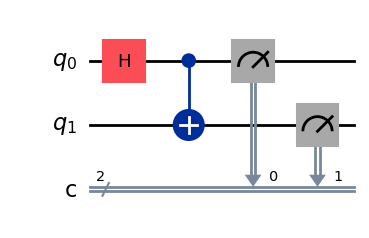

In [10]:
# %inline matplotlib

qc.draw(output='mpl')

In [11]:
job = Aer.get_backend('qasm_simulator').run(qc, shots=1024)
result = job.result()
counts = result.get_counts()
print(counts)

{'00': 512, '11': 512}


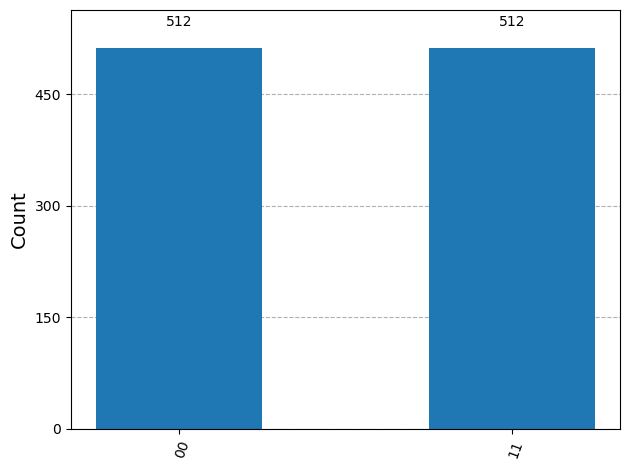

In [12]:
from qiskit.visualization import plot_histogram
plot_histogram(counts)


In [13]:
backend = service.backend("ibm_brisbane")

IBM Quantum now requires you to transpile your circuit for the backend before running it.

Solution:
Transpile your circuit for the backend using Qiskit’s ‎`transpile` function.

In [14]:
from qiskit import transpile
transpiled_qc = transpile(qc, backend=backend)

`backend.run()` is no longer supported in the latest Qiskit IBM Runtime API.
You now need to use the Qiskit Primitives interface (`Sampler` for measurement counts,`Estimator` for expectation values).

 `Sampler` returns quasi-probabilities, which are similar to counts but may include negative values due to error mitigation. For most simple circuits, they closely resemble actual counts.
 • If you want to run multiple circuits, pass a list: `circuits=[qc1, qc2, ...]`.

In [27]:
from qiskit_ibm_runtime import Sampler
import time

sampler = Sampler(backend)
# need to pass a list of circuits to `sampler.run()`, even if you have only one circuit.

job = sampler.run([transpiled_qc], shots=1024)
while not job.done():
    print(f"Job is still running. Current status: {job.status()}")
    time.sleep(2)  # Wait for 10 seconds before checking again

job.wait_for_final_state()
print(f"Job completed with status: {job.status()}")

Job is still running. Current status: RUNNING
Job is still running. Current status: RUNNING
Job is still running. Current status: RUNNING
Job is still running. Current status: RUNNING
Job is still running. Current status: RUNNING
Job is still running. Current status: RUNNING
Job is still running. Current status: RUNNING
Job completed with status: DONE


In [28]:
result = job.result()
result

PrimitiveResult([SamplerPubResult(data=DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>)), metadata={'circuit_metadata': {}})], metadata={'execution': {'execution_spans': ExecutionSpans([DoubleSliceSpan(<start='2025-08-28 14:14:36', stop='2025-08-28 14:14:38', size=1024>)])}, 'version': 2})

In [29]:
result[0].data

DataBin(c=BitArray(<shape=(), num_shots=1024, num_bits=2>))

In [30]:

bitvals = result[0].data.c  

counts = bitvals.get_counts()

print(counts)

{'00': 519, '11': 482, '10': 14, '01': 9}


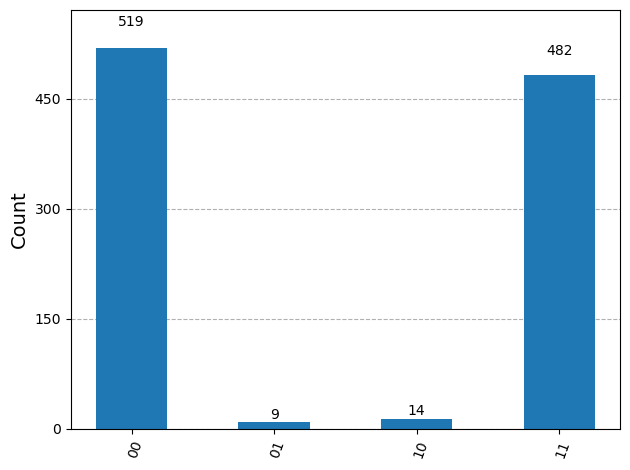

In [31]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
plot_histogram(counts)